In [8]:
import random
from pprint import pprint

import frigidum
import numpy as np
from frigidum.examples import tsp
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.optimize import minimize
from scipy.spatial import distance
import networkx as nx

### Subtask 1

In [9]:
n = 100
m = 200

In [55]:
matrix = np.zeros((n, n), dtype=int)

In [56]:
edges = 0
while edges < m:
    a = random.randint(0, n - 1)
    b = random.randint(0, n - 1)
    if a == b or matrix[a, b] != 0:
        continue
    matrix[a, b] = 1
    matrix[b, a] = 1
    edges += 1

In [57]:
G = nx.from_numpy_matrix(matrix)

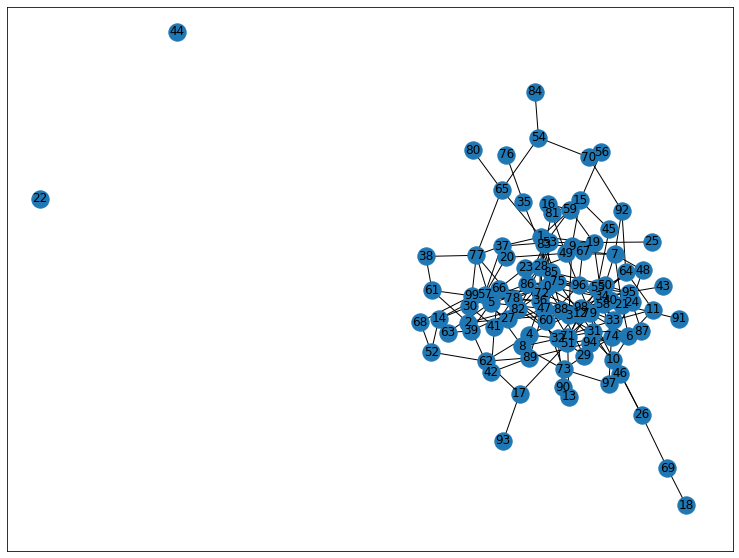

In [58]:
plt.figure(figsize=(13, 10))
nx.draw_networkx(G)

In [59]:
matrix

array([[0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
adjacency_list = [set() for i in range(n)]

In [61]:
for line in nx.generate_adjlist(G):
    node = int(line.split(" ")[0])
    edges = list(map(int, line.split(" ")[1:]))
    for edge in edges:
        adjacency_list[node].add(edge)
        adjacency_list[edge].add(node)

In [62]:
for i, edges in enumerate(adjacency_list):
    print(i, edges)

0 {1, 34, 98, 4, 5, 53, 88}
1 {0, 65, 37, 72, 15, 19, 85}
2 {82, 27, 61, 62}
3 {4, 9, 10, 47, 60}
4 {0, 32, 3, 62}
5 {0, 39, 77, 47, 63}
6 {10, 11, 79, 21, 94}
7 {67, 48, 49, 50, 21, 92}
8 {73, 57, 89, 71}
9 {83, 3, 15}
10 {26, 3, 6, 79}
11 {64, 33, 6}
12 {64, 40, 46, 85, 27}
13 {71}
14 {57, 52, 30}
15 {1, 9, 45, 81, 56}
16 {49, 59}
17 {51, 93, 62}
18 {69}
19 {1, 53, 25, 58, 59}
20 {49, 57}
21 {6, 7, 40, 47, 91}
22 set()
23 {96, 66}
24 {48, 33, 74, 96}
25 {19}
26 {10, 69, 46}
27 {2, 99, 12}
28 {67, 36, 47, 81, 82, 86}
29 {88, 73, 74, 51}
30 {41, 14, 86}
31 {36, 87, 71}
32 {33, 98, 4, 78, 51, 90}
33 {32, 34, 98, 11, 24, 58}
34 {0, 33, 64, 98, 43, 75, 51, 95}
35 {76, 85}
36 {98, 99, 78, 85, 88, 28, 31}
37 {1, 77, 53, 57}
38 {77, 61}
39 {82, 5, 63}
40 {96, 98, 12, 21, 58}
41 {66, 42, 78, 47, 30}
42 {89, 41}
43 {34}
44 set()
45 {55, 15}
46 {26, 12}
47 {3, 5, 72, 41, 75, 60, 21, 85, 89, 28}
48 {24, 55, 7}
49 {67, 7, 79, 16, 20}
50 {98, 7, 74, 85, 95}
51 {32, 34, 98, 74, 17, 82, 29}
52 {62, 

### Subtask 2

In [63]:
def dfs(adjacency_list):
    connectivity_components_index = [-1] * len(adjacency_list)


    def process_node(node, index):
        connectivity_components_index[node] = index
        for edge in adjacency_list[node]:
            if connectivity_components_index[edge] == -1:
                process_node(edge, index)


    current_index = -1
    for i, index in enumerate(connectivity_components_index):
        if index == -1:
            current_index += 1
            process_node(i, current_index)

    return set(connectivity_components_index)

In [64]:
dfs(adjacency_list)

{0, 1, 2}

In [65]:
a = random.randint(0, n - 1)
b = random.randint(0, n - 1)
a, b

(31, 35)

In [68]:
def bfs(start_node, end_node, adjacency_list):
    queue = [start_node]
    path_len = [-1] * len(adjacency_list)
    path_len[start_node] = 0
    i = 0
    while i < len(queue):
        for node in adjacency_list[queue[i]]:
            if node not in queue:
                queue.append(node)
                path_len[node] = path_len[queue[i]] + 1
        i += 1
    path_len = np.array(path_len)

    if path_len[end_node] == -1:
        return []
    shortest_path = []
    current_node = end_node
    while current_node != start_node:
        shortest_path.append(current_node)
        arg = np.argmin(path_len[list(adjacency_list[current_node])])
        current_node = list(adjacency_list[current_node])[arg]
    shortest_path.append(current_node)
    return list(reversed(shortest_path))

In [69]:
bfs(a, b, adjacency_list)

[31, 36, 85, 35]